# Bharat Intern Data science internship


# Task1: Titanic classification


# About Dataset

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etlgorithms.

Downloded dataset from - https://www.kaggle.com/datasets/yasserh/titanic-dataset




 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the dataset
titanic = pd.read_csv("Titanic-Dataset.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Reading the first five rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Reading the last five rows
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# To shows the number of rows and columns in the dataset
titanic.shape

(891, 12)

In [6]:
#checking for columns
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

PassengerId - PassengerId.
Survival - Survival in Titanic.
pclass - Passenger class.
Name - Name of the passenger.
Sex - Sex.
Age - Age in year.
SibSp - Siblings/spouses aboard the Titanic.
Parch - Parents/children aboard the Titanic.
Ticket - ticket number.
Fare - Passenger fare.
Cabin - cabin number.
Embarked - Port of embarkation (C-Cherbourg, Q- Queenstown, S- Southampton, O- others)

# Data Preprocessing and  Cleaning

In [7]:
# check the data types
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# check the duplicated value
titanic.duplicated().sum()

0

In [9]:
#Checking the null values
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

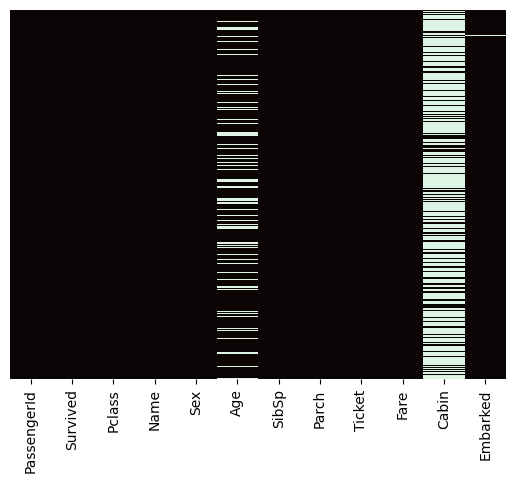

In [12]:
sns.heatmap(titanic.isnull(),yticklabels= False, cbar=False,cmap="mako")

In [10]:
#checking for number of null values 
nval = titanic.isnull().sum().sort_values(ascending=False)
nval = nval[nval>0]
nval

Cabin       687
Age         177
Embarked      2
dtype: int64

In [11]:
#checking the what percentage missing columns value
titanic.isnull().sum().sort_values(ascending=False)*100/len(titanic)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

1. There are high percentage of NaN values are present that is more then 75% so we will just drop the cabin column.
2. In the age column there are less than 20%  NaN values are there so we will impute the mean age.
3. Only 2 NaN values are there in embarked column so we will impute the most frequent embarkation place.

In [12]:
#drop the cabin column
titanic.drop(columns =  'Cabin', axis = 1, inplace=True)
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<Axes: >

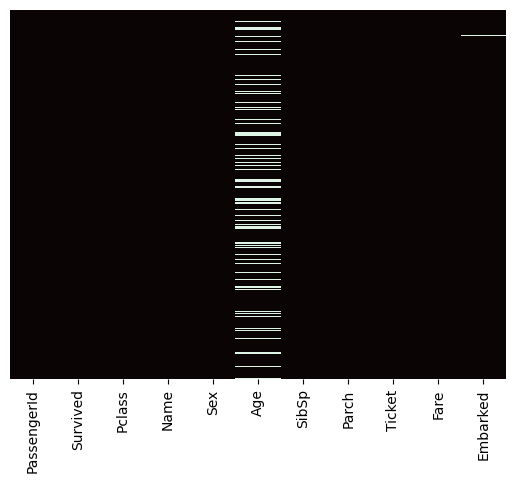

In [17]:
sns.heatmap(titanic.isnull(),yticklabels= False, cbar=False,cmap="mako")

In [13]:
# Filling Null Values in Age column with mean values of age column
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

#Filling the Null values in Embarked column with mode of embarked column

titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

<Axes: >

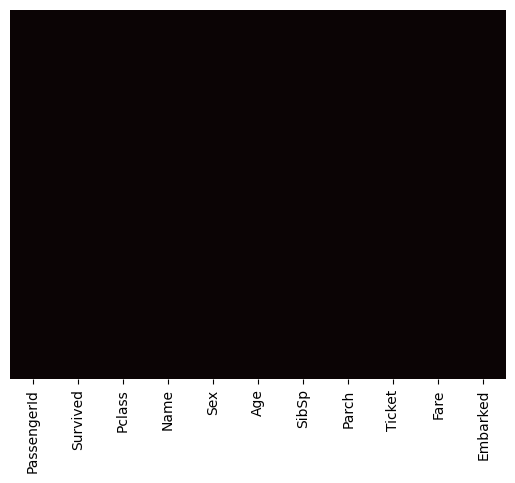

In [14]:
#To check the null values in heatmap
sns.heatmap(titanic.isnull(),yticklabels= False, cbar=False,cmap="mako")

In [15]:
# Finding no. of unique values in each column of dataset
titanic[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             89
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [16]:
titanic['Survived'].unique()


array([0, 1], dtype=int64)

In [17]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [19]:
titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [20]:
titanic['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [21]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
# we dont required the some columns as per our objective so drop it.
titanic.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)

<Axes: >

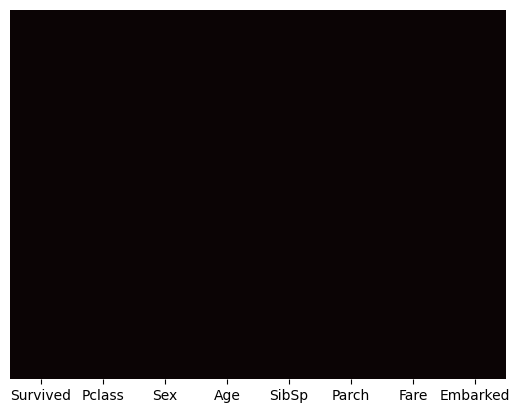

In [23]:
sns.heatmap(titanic.isnull(),yticklabels= False, cbar=False,cmap="mako")

In [24]:
# Information about the whole dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [25]:
#Showing the information about non categorical column
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
# showing info. about categorical columns
titanic.describe(include='O')

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


# Data Visualization

In [27]:
#Sex column
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

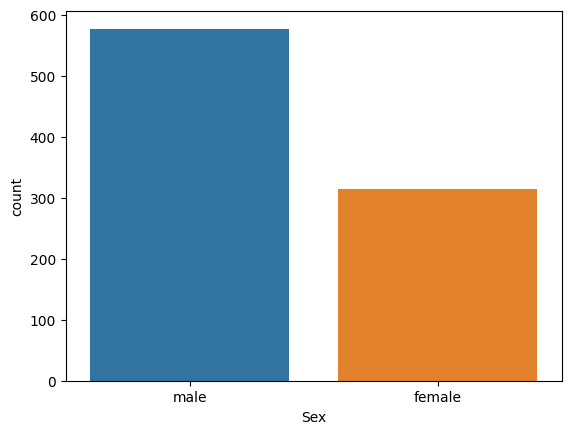

In [28]:
#Plotting count column for sex column
sns.countplot(x=titanic['Sex'])
plt.show()                 

<Axes: xlabel='Survived', ylabel='count'>

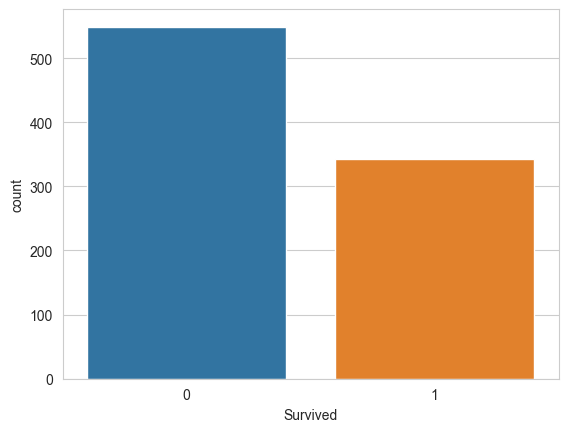

In [29]:
#plotting survived column
sns.set_style('whitegrid')
sns.countplot(x='Survived',data= titanic) 

<Axes: xlabel='Survived', ylabel='count'>

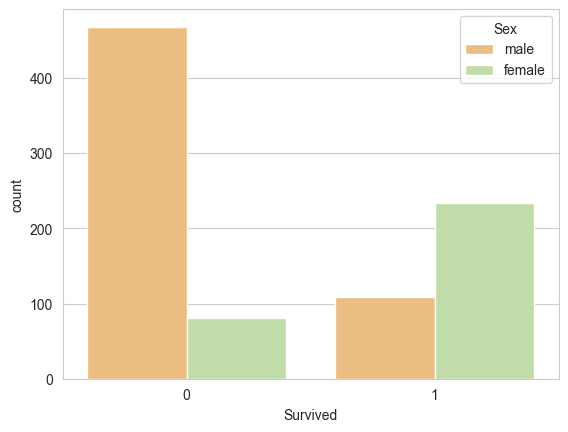

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue= 'Sex', data= titanic,palette= 'Spectral')

<Axes: xlabel='Survived', ylabel='count'>

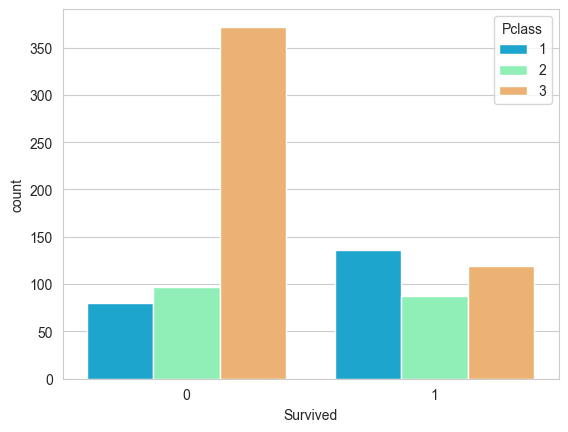

In [31]:
#plotting passenger class survive
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue= 'Pclass', data= titanic,palette= 'rainbow')

<Axes: xlabel='Pclass', ylabel='count'>

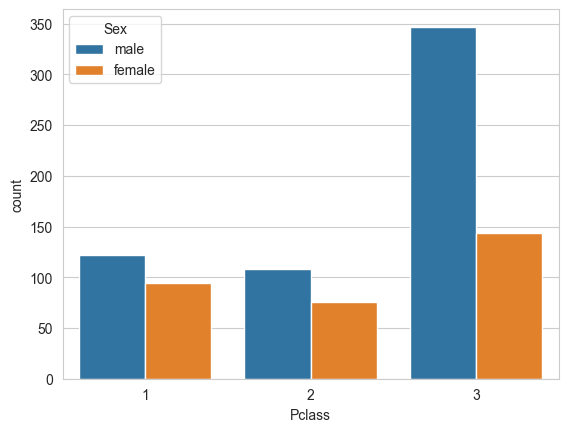

In [32]:
# Showing Distribution of Pclass Sex wise
sns.countplot(x=titanic['Pclass'],hue=titanic['Sex'])

<Axes: >

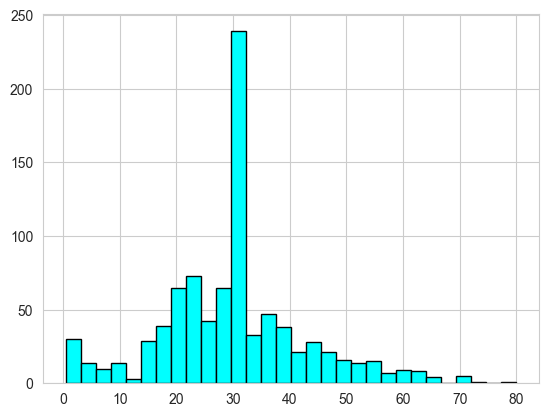

In [33]:
# age distribution
titanic['Age'].hist(bins= 30,color= 'cyan',ec='black')

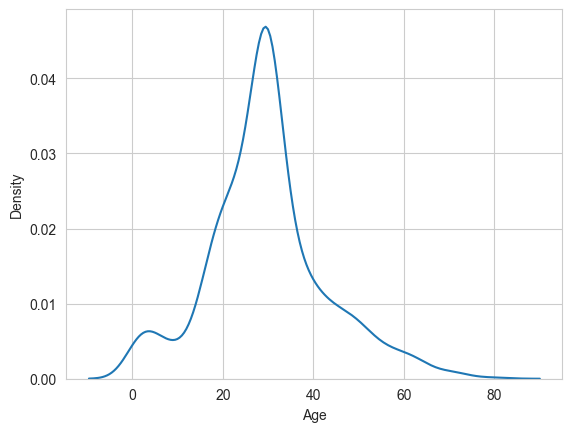

In [34]:
sns.kdeplot(x=titanic['Age'])
plt.show()

The age column represents the bell shaped curve that means the age column follows normal distribution.

<Axes: xlabel='SibSp', ylabel='count'>

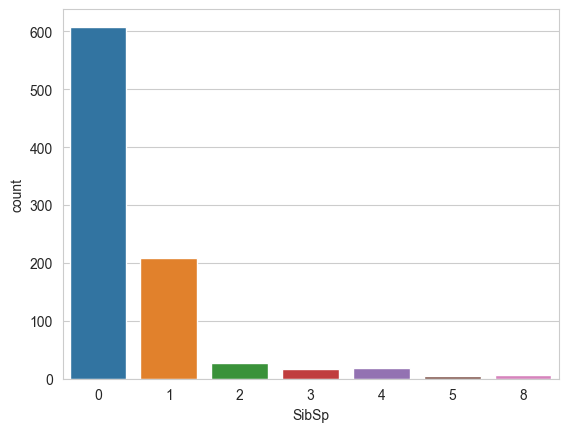

In [35]:
sns.countplot(x='SibSp',data=titanic)

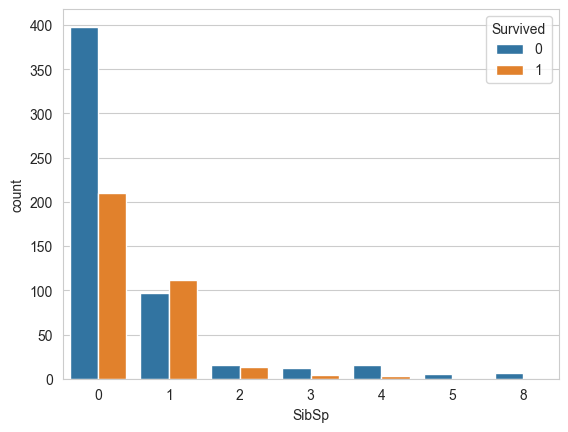

In [36]:
# Showing Distribution of SibSp Survived Wise
sns.countplot(x=titanic['SibSp'],hue=titanic['Survived'])
plt.show()

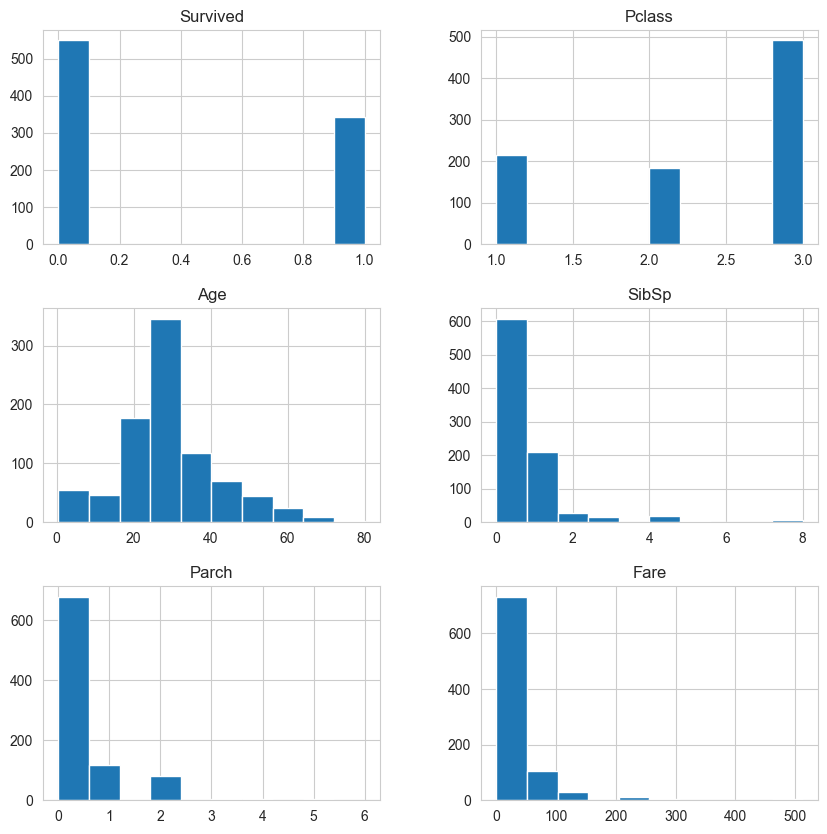

In [37]:
# Plotting Histplot for Dataset
titanic.hist(figsize=(10,10))
plt.show()

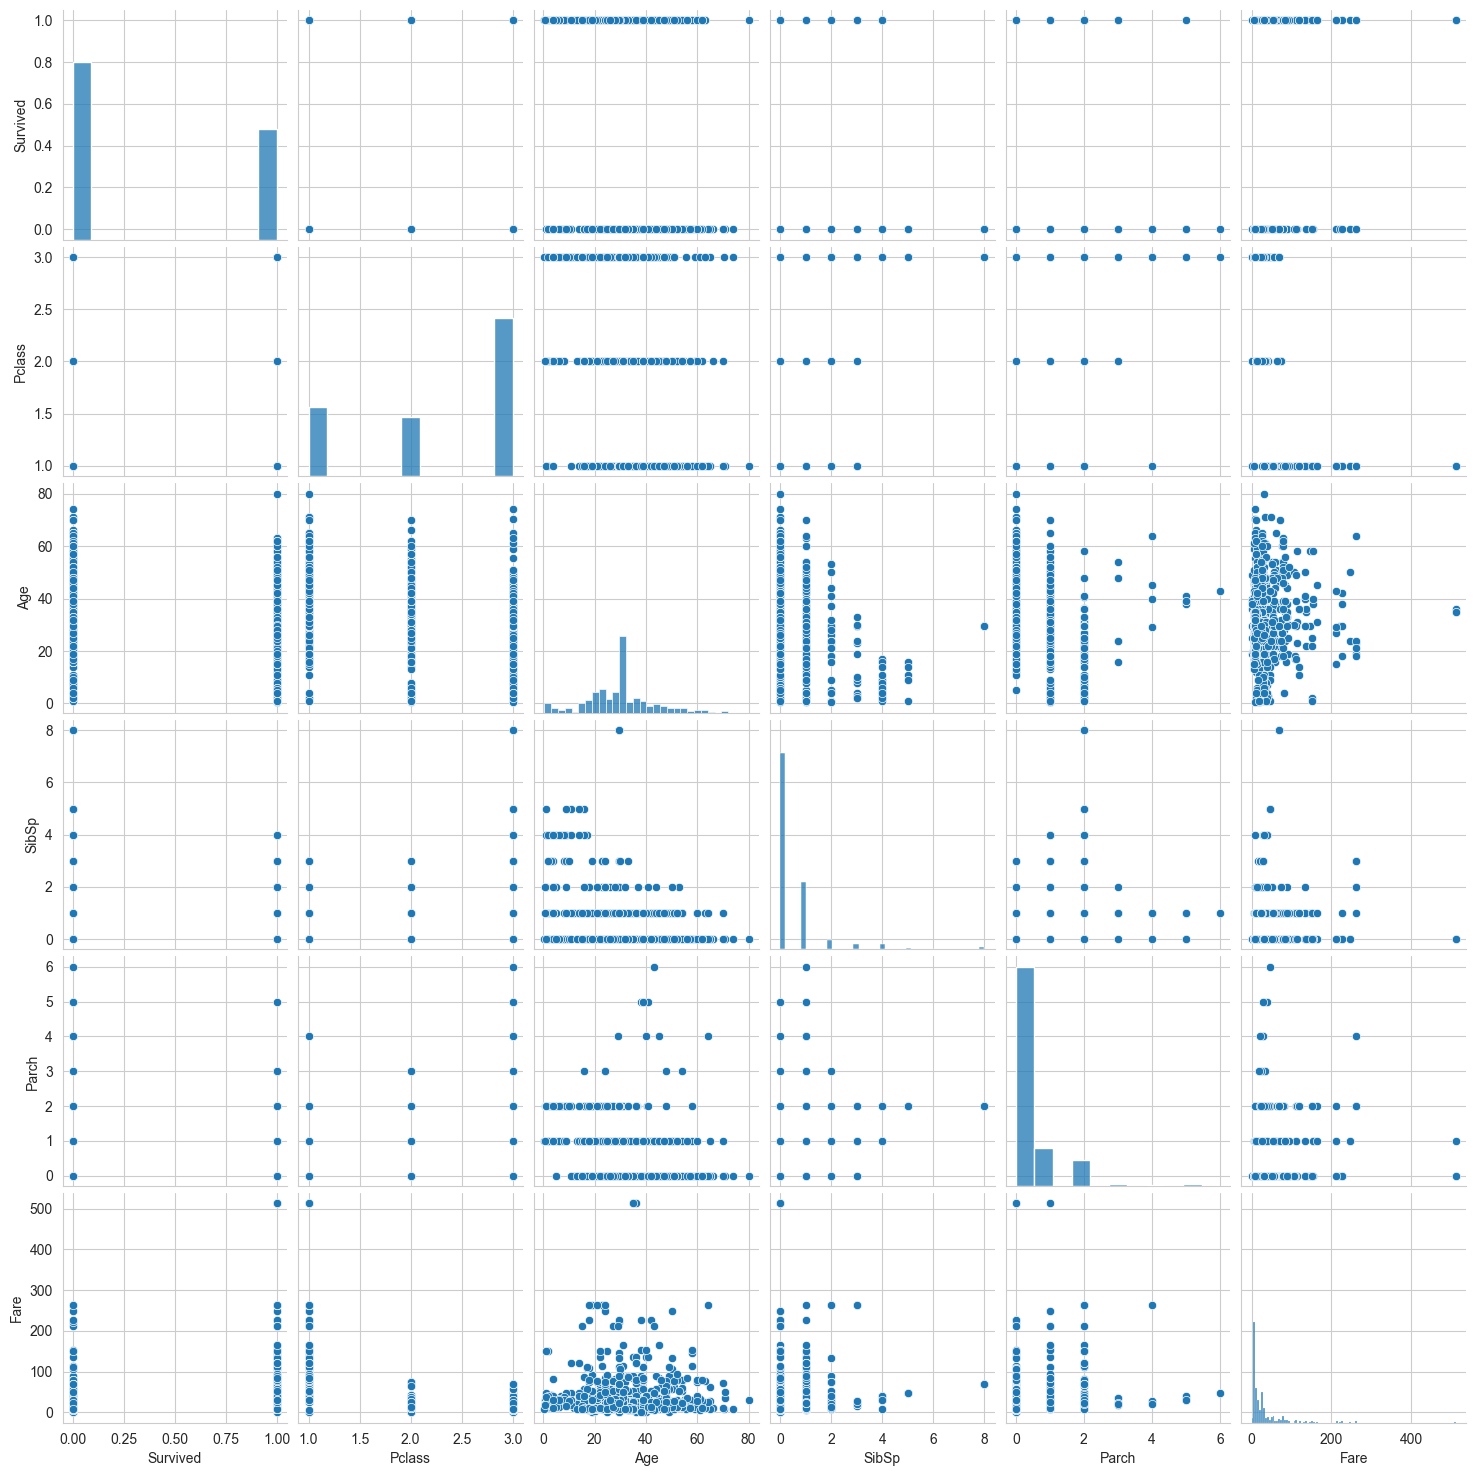

In [40]:
# Plotting pairplot
sns.pairplot(titanic)
plt.show()

# Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for column in ['Sex','Embarked']:
    titanic[column] = le.fit_transform(titanic[column])

titanic.head()

# Sex Column

# 0 represents female
# 1 represents Male

# Embarked Column

# 0 represents C
# 1 represents Q
# 2 represents S

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [42]:
# importing libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Selecting independent and dependent Features

In [43]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = titanic[cols]
y = titanic['Survived']
print(x.shape)
print(y.shape)
print(type(x))  # DataFrame
print(type(y))  # Series

(891, 7)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [60]:
x.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [44]:
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Train_Test_Split

In [45]:
print(891*0.10)

89.10000000000001


In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


Creating Functions to compute Confusion Matrix, Classification Report and to generate Training and the Testing Score(Accuracy)

In [48]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuracy

# 1. Logistic Regression

In [51]:
# Building the logistic Regression Model
lr = LogisticRegression(max_iter=1000,solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [52]:
# Computing Training and Testing score
mscore(lr)

Training Score 0.8052434456928839
Testing Score 0.7666666666666667


In [53]:
# Generating Prediction
ypred_lr = lr.predict(x_test)
print(ypred_lr)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [54]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_lr)
acc_lr = accuracy_score(y_test,ypred_lr)
print('Accuracy Score',acc_lr)

Confusion Matrix
 [[46  7]
 [14 23]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.87      0.81        53
           1       0.77      0.62      0.69        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


# 2. RandomForest Classifier 

In [55]:
# Building the RandomForest Classifier Model
rfc=RandomForestClassifier(n_estimators=80,criterion='entropy',min_samples_split=5,max_depth=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=80)

In [56]:
# Computing Training and Testing score
mscore(rfc)

Training Score 0.9225967540574282
Testing Score 0.7666666666666667


In [57]:
# Generating Prediction
ypred_rfc = rfc.predict(x_test)
print(ypred_rfc)

[1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [58]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_rfc)
acc_rfc = accuracy_score(y_test,ypred_rfc)
print('Accuracy Score',acc_rfc)

Confusion Matrix
 [[47  6]
 [15 22]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        53
           1       0.79      0.59      0.68        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


# 3.  DecisionTreeClassifier

In [59]:
# Building the DecisionTree Classifier Model
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_split=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [60]:
# Computing Training and Testing score
mscore(dt)

Training Score 0.8526841448189763
Testing Score 0.7777777777777778


In [61]:
# Generating Prediction
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [62]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_dt)
acc_dt = accuracy_score(y_test,ypred_dt)
print('Accuracy Score',acc_dt)

Confusion Matrix
 [[46  7]
 [13 24]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        53
           1       0.77      0.65      0.71        37

    accuracy                           0.78        90
   macro avg       0.78      0.76      0.76        90
weighted avg       0.78      0.78      0.77        90

Accuracy Score 0.7777777777777778


# 4.  KNeighborsClassifier

In [63]:
# Building the knnClassifier Model
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [64]:
# Computing Training and Testing score
mscore(knn)

Training Score 0.7752808988764045
Testing Score 0.6777777777777778


In [65]:
# Generating Prediction
ypred_knn = knn.predict(x_test)
print(ypred_knn)

[1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]


In [66]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_knn)
acc_knn = accuracy_score(y_test,ypred_knn)
print('Accuracy Score',acc_knn)

Confusion Matrix
 [[47  6]
 [23 14]]
Classification Report
               precision    recall  f1-score   support

           0       0.67      0.89      0.76        53
           1       0.70      0.38      0.49        37

    accuracy                           0.68        90
   macro avg       0.69      0.63      0.63        90
weighted avg       0.68      0.68      0.65        90

Accuracy Score 0.6777777777777778


# 5. SVC

In [67]:
# Building Support Vector Classifier Model
svc = SVC(C=1.0)
svc.fit(x_train, y_train)

SVC()

In [68]:
# Computing Training and Testing score
mscore(svc)

Training Score 0.6891385767790262
Testing Score 0.6333333333333333


In [69]:
# Generating Prediction
ypred_svc = svc.predict(x_test)
print(ypred_svc)

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


In [70]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_svc)
acc_svc = accuracy_score(y_test,ypred_svc)
print('Accuracy Score',acc_svc)

Confusion Matrix
 [[48  5]
 [28  9]]
Classification Report
               precision    recall  f1-score   support

           0       0.63      0.91      0.74        53
           1       0.64      0.24      0.35        37

    accuracy                           0.63        90
   macro avg       0.64      0.57      0.55        90
weighted avg       0.64      0.63      0.58        90

Accuracy Score 0.6333333333333333


# 6. AdaBoostClassifier

In [71]:
# Builing the Adaboost model
ada_boost  = AdaBoostClassifier(n_estimators=80)
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=80)

In [72]:
# Computing the Training and Testing Score
mscore(ada_boost)

Training Score 0.8564294631710362
Testing Score 0.7666666666666667


In [73]:
# Generating the predictions
ypred_ada_boost = ada_boost.predict(x_test)
print(ypred_ada_boost)

[1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0
 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0]


In [74]:
# Evaluate the model - confusion matrix, classification Report, Accuracy Score
cls_eval(y_test,ypred_ada_boost)
acc_adab = accuracy_score(y_test,ypred_ada_boost)
print('Accuracy Score',acc_adab)

Confusion Matrix
 [[45  8]
 [13 24]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.85      0.81        53
           1       0.75      0.65      0.70        37

    accuracy                           0.77        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


In [75]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest Classifier','Decision Tree Classifier','KNeighborsClassifier','SVC','Ada Boost Classifier'],
    'Score': [acc_lr,acc_rfc,acc_dt,acc_knn,acc_svc,acc_adab]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Decision Tree Classifier,0.777778
0,Logistic Regression,0.766667
1,Random Forest Classifier,0.766667
5,Ada Boost Classifier,0.766667
3,KNeighborsClassifier,0.677778
4,SVC,0.633333


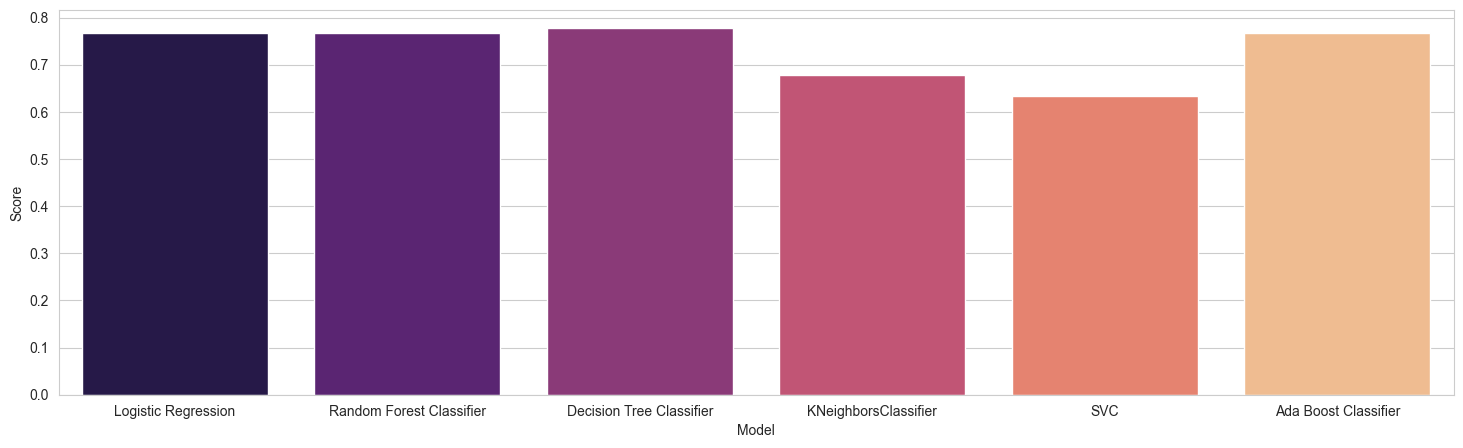

In [76]:
sns.set_style("whitegrid")
plt.figure(figsize=(18,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette="magma" )
plt.show()

Random forest and decision tree has highest accuracy.